In [47]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import os
import pandas as pd
from scipy.optimize import curve_fit
from numpy.linalg import lstsq
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

#import computation_fucntions_gradient_balance
#from computation_fucntions_gradient_balance import *

#import plot_functions_gradient_balance
#from plot_functions_gradient_balance import *

In [2]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

C:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

In [4]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    angles = np.zeros_like(u_DDM)

    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl

def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles) 

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)    

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl

    
def compute_Coriolis_marix(latitude, u_pred_selected_pl):
    Omega = 7.2921e-5  
    latitudes_2d = np.tile(latitude[:,0], (u_pred_selected_pl.shape[1], 1)).T  
    f = 2 * Omega * np.sin(np.radians(latitudes_2d))
    return f

def center_in_LPC(array, LPC_index, half_width):
    j_center, i_center = LPC_index
    array_centered = array[
    j_center - half_width : j_center + half_width + 1,
    i_center - half_width : i_center + half_width + 1
    ]
    return array_centered

def redefine_arrays_centered(LPC_index, half_width, Phi, ws, lat, lon, f):
    Phi_cent = center_in_LPC(Phi, LPC_index, half_width)
    ws_cent = center_in_LPC(ws, LPC_index, half_width)
    lat_cent = center_in_LPC(lat, LPC_index, half_width)
    lon_cent = center_in_LPC(lon, LPC_index, half_width)
    f_cent = center_in_LPC(f, LPC_index, half_width)
    return Phi_cent, ws_cent, lat_cent, lon_cent, f_cent

def mask_around_circle(array, LPC_index, half_width):
    i, j = np.indices(array.shape)
    j_center, i_center = LPC_index
    distance = np.sqrt((i - i_center)**2 + (j - j_center)**2)
    mask = distance < half_width
    array_circled = np.where(mask, array, np.nan)
    return array_circled

def redefine_arrays_circular(LPC_index, half_width, Phi, ws, f):
    #keep values in the circle around LPC, set NaNs all the others values
    Phi_circ = mask_around_circle(Phi, LPC_index, half_width)
    ws_circ = mask_around_circle(ws, LPC_index, half_width)
    f_circ = mask_around_circle(f, LPC_index, half_width)
    return Phi_circ, ws_circ, f_circ

def get_array_centered_circled(LPC_pred_index_1, LPC_gt_index_1, half_width, latitude,longitude,f, Phi_pred_selected_pl, ws_pred_selected_pl, Phi_gt_selected_pl, ws_gt_selected_pl):
    Phi_pred_centered, ws_pred_centered, lat_pred_centered, lon_pred_centered, f_pred_centered = redefine_arrays_centered(LPC_pred_index_1, half_width, Phi_pred_selected_pl, ws_pred_selected_pl,latitude,longitude,f)
    Phi_gt_centered, ws_gt_centered, lat_gt_centered, lon_gt_centered, f_gt_centered = redefine_arrays_centered(LPC_gt_index_1, half_width, Phi_gt_selected_pl, ws_gt_selected_pl,latitude,longitude,f)

    LPC_pred_index_2 = np.unravel_index(np.argmin(Phi_pred_centered), Phi_pred_centered.shape)
    LPC_gt_index_2 = np.unravel_index(np.argmin(Phi_gt_centered), Phi_gt_centered.shape)

    Phi_pred_circ, ws_pred_circ, f_pred_circ = redefine_arrays_circular(LPC_pred_index_2, half_width,Phi_pred_centered, ws_pred_centered, f_pred_centered)
    Phi_gt_circ, ws_gt_circ, f_gt_circ = redefine_arrays_circular(LPC_gt_index_2, half_width,Phi_gt_centered, ws_gt_centered, f_gt_centered)
    
    return LPC_pred_index_2, LPC_gt_index_2, Phi_pred_centered, ws_pred_centered, lat_pred_centered, lon_pred_centered, f_pred_centered, Phi_pred_circ, ws_pred_circ, f_pred_circ, Phi_gt_centered, ws_gt_centered, lat_gt_centered, lon_gt_centered, f_gt_centered, Phi_gt_circ, ws_gt_circ, f_gt_circ

def fit_geopotential_r_theta(LPC_index_2, Phi_obs_circ, N, M):
    rows, cols = Phi_obs_circ.shape
    j_center, i_center = LPC_index_2

    # Step 1: Compute polar coordinates
    i, j = np.indices((rows, cols))
    x = j - j_center  # horizontal (cols)
    y = i - i_center  # vertical (rows)
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)  # range [-pi, pi]

    # Step 2: Flatten valid data
    mask = ~np.isnan(Phi_obs_circ)
    r_flat = r[mask]
    theta_flat = theta[mask]
    phi_flat = Phi_obs_circ[mask]

    # Step 3: Build design matrix A with basis functions
    terms = []
    for n in range(N+1):
        for m in range(M+1):
            terms.append((r_flat**n) * np.cos(m * theta_flat))
            if m > 0:
                terms.append((r_flat**n) * np.sin(m * theta_flat))
    A = np.vstack(terms).T  # Shape: (num_points, num_terms)

    # Step 4: Solve least squares
    coeffs, _, _, _ = lstsq(A, phi_flat, rcond=None)

    # Step 5: Reconstruct fitted Phi
    Phi_fit = np.full_like(Phi_obs_circ, np.nan)
    A_full_terms = []
    for n in range(N+1):
        for m in range(M+1):
            A_full_terms.append((r**n) * np.cos(m * theta))
            if m > 0:
                A_full_terms.append((r**n) * np.sin(m * theta))
    A_full = np.stack(A_full_terms, axis=-1)
    Phi_fit[mask] = A_full[mask] @ coeffs  # matrix-vector dot product

    return Phi_fit, coeffs, r, theta

def compute_r_derivative(r, theta, coeffs, N, M):
    """
    Compute the partial derivative of Phi with respect to r.
    Inputs:
        r      : radial distance matrix (same shape as grid)
        theta  : azimuthal angle matrix
        coeffs : flattened array of coefficients (from the fit)
        N, M   : degrees used in the fit
    Returns:
        dPhi_dr : partial derivative ∂Phi/∂r
    """
    rows, cols = r.shape
    dPhi_dr = np.zeros_like(r)
    idx = 0
    for n in range(N+1):
        for m in range(M+1):
            if n == 0:
                idx += 1 if m == 0 else 2  # skip zero derivative terms
                continue
            a = coeffs[idx]
            dPhi_dr += n * (r ** (n - 1)) * np.cos(m * theta) * a
            idx += 1
            if m > 0:
                b = coeffs[idx]
                dPhi_dr += n * (r ** (n - 1)) * np.sin(m * theta) * b
                idx += 1
    return dPhi_dr

def get_vg(coeffs, f_circ, r, theta, N, M):
    '''
    get the wind speed assuming perfect gradient balance
    '''
    dPhi_dr = compute_r_derivative(r, theta, coeffs, N, M)
    
    Delta = (f_circ*r/2)**2 + dPhi_dr*r
    
    vg_plus = - (f_circ*r/2) + np.sqrt(Delta)
    vg = vg_plus
    
    #vg_minus = - (f*r/2) - np.sqrt(Delta)  is unphysical, bcs gives negative tangential velocities

    return vg 


def function(pl_selected, half_width, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, angles, LAT_NWP, LON_NWP, LAT_DDM, LON_DDM, N, M):

    #NWP prepare datasets and print location of the LPC
    latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, LAT_NWP, LON_NWP, pl_selected)
    ws_pred_selected_pl_NWP = np.sqrt(u_pred_selected_pl_NWP**2 + v_pred_selected_pl_NWP**2)
    ws_gt_selected_pl_NWP = np.sqrt(u_gt_selected_pl_NWP**2 + v_gt_selected_pl_NWP**2)
    
    f_NWP = compute_Coriolis_marix(latitude_NWP, u_pred_selected_pl_NWP)
    
    LPC_pred_index_1_NWP = np.unravel_index(np.argmin(Phi_pred_selected_pl_NWP), Phi_pred_selected_pl_NWP.shape)
    #print("LPC pred index (row, col):", LPC_pred_index_1_NWP)
    LPC_gt_index_1_NWP = np.unravel_index(np.argmin(Phi_gt_selected_pl_NWP), Phi_gt_selected_pl_NWP.shape)
    #print("LPC gt index (row, col):", LPC_gt_index_1_NWP)
    
    
    #DDM prepare datasets and print location of the LPC
    latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, LAT_DDM, LON_DDM, pl_selected)
    ws_pred_selected_pl_DDM = np.sqrt(u_pred_selected_pl_DDM**2 + v_pred_selected_pl_DDM**2)
    ws_gt_selected_pl_DDM = np.sqrt(u_gt_selected_pl_DDM**2 + v_gt_selected_pl_DDM**2)
    
    f_DDM = compute_Coriolis_marix(latitude_DDM, u_pred_selected_pl_DDM)
    
    LPC_pred_index_1_DDM = np.unravel_index(np.argmin(Phi_pred_selected_pl_DDM), Phi_pred_selected_pl_DDM.shape)
    #print("LPC pred index (row, col):", LPC_pred_index_1_DDM)
    LPC_gt_index_1_DDM = np.unravel_index(np.argmin(Phi_gt_selected_pl_DDM), Phi_gt_selected_pl_DDM.shape)
    #print("LPC gt index (row, col):", LPC_gt_index_1_DDM)

 
    #get_array_centered_circled (NWP pred, DDM pred, gt data)
    LPC_pred_index_2_NWP, LPC_gt_index_2_NWP, Phi_pred_centered_NWP, ws_pred_centered_NWP, lat_pred_centered_NWP, lon_pred_centered_NWP, f_pred_centered_NWP, Phi_pred_circ_NWP, ws_pred_circ_NWP, f_pred_circ_NWP, Phi_gt_centered_NWP, ws_gt_centered_NWP, lat_gt_centered_NWP, lon_gt_centered_NWP, f_gt_centered_NWP, Phi_gt_circ_NWP, ws_gt_circ_NWP, f_gt_circ_NWP = get_array_centered_circled(LPC_pred_index_1_NWP, LPC_gt_index_1_NWP, half_width, latitude_NWP,longitude_NWP,f_NWP, Phi_pred_selected_pl_NWP, ws_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, ws_gt_selected_pl_NWP)
    
    LPC_pred_index_2_DDM, LPC_gt_index_2_DDM, Phi_pred_centered_DDM, ws_pred_centered_DDM, lat_pred_centered_DDM, lon_pred_centered_DDM, f_pred_centered_DDM, Phi_pred_circ_DDM, ws_pred_circ_DDM, f_pred_circ_DDM, Phi_gt_centered_DDM, ws_gt_centered_DDM, lat_gt_centered_DDM, lon_gt_centered_DDM, f_gt_centered_DDM, Phi_gt_circ_DDM, ws_gt_circ_DDM, f_gt_circ_DDM = get_array_centered_circled(LPC_pred_index_1_DDM, LPC_gt_index_1_DDM, half_width, latitude_DDM, longitude_DDM, f_DDM, Phi_pred_selected_pl_DDM, ws_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, ws_gt_selected_pl_DDM)
    
    lat_pred_obs_NWP, lon_pred_obs_NWP = lat_pred_centered_NWP, lon_pred_centered_NWP
    lat_pred_obs_DDM, lon_pred_obs_DDM = lat_pred_centered_DDM, lon_pred_centered_DDM
    lat_gt_obs_NWP, lon_gt_obs_NWP = lat_gt_centered_NWP, lon_gt_centered_NWP

    #fit_geopotential_r_theta (NWP pred, DDM pred, gt data)
    Phi_pred_fit_NWP, coefficients_pred_fit_NWP, r_pred_fit_NWP, theta_pred_fit_NWP = fit_geopotential_r_theta(LPC_pred_index_2_NWP, Phi_pred_circ_NWP, N, M)
    Phi_pred_fit_DDM, coefficients_pred_fit_DDM, r_pred_fit_DDM, theta_pred_fit_DDM = fit_geopotential_r_theta(LPC_pred_index_2_DDM, Phi_pred_circ_DDM,  N, M)
    Phi_gt_fit_NWP, coefficients_gt_fit_NWP, r_gt_fit_NWP, theta_gt_fit_NWP = fit_geopotential_r_theta(LPC_gt_index_2_NWP, Phi_gt_circ_NWP,  N, M)
    
    vg_pred_fit_NWP = get_vg(coefficients_pred_fit_NWP, f_pred_circ_NWP, r_pred_fit_NWP, theta_pred_fit_NWP, N, M)
    vg_pred_fit_DDM = get_vg(coefficients_pred_fit_DDM, f_pred_circ_DDM, r_pred_fit_DDM, theta_pred_fit_DDM, N, M)
    vg_gt_fit_NWP = get_vg(coefficients_gt_fit_NWP, f_gt_circ_NWP, r_gt_fit_NWP, theta_gt_fit_NWP, N, M)

    return ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP,vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP,r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP
    

In [5]:
LAT_DDM = [7,350] 
LON_DDM = [7,350]
LAT_NWP = [8,351]
LON_NWP = [8,351]


u_DDM_gt_06_0507 = DDM_gt_06_0507['x_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
u_DDM_gt_06_0507 = np.array(u_DDM_gt_06_0507)

u_NWP_gt_06_0507 = NWP_gt_06_0507['x_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
u_NWP_gt_06_0507 = np.array(u_NWP_gt_06_0507)

v_DDM_gt_06_0507 = DDM_gt_06_0507['y_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
v_DDM_gt_06_0507 = np.array(v_DDM_gt_06_0507)

v_NWP_gt_06_0507 = NWP_gt_06_0507['y_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
v_NWP_gt_06_0507 = np.array(v_NWP_gt_06_0507)

angles = calculate_rotation_angles(u_DDM_gt_06_0507, v_DDM_gt_06_0507, u_NWP_gt_06_0507, v_NWP_gt_06_0507)

pl_selected = 850

In [58]:
def plot_azimuthal_averages(
    all_ws_pred_nwp, all_ws_pred_ddm, all_ws_gt_nwp,
    all_vg_pred_nwp, all_vg_pred_ddm, all_vg_gt_nwp,
    all_r_pred_nwp, all_r_pred_ddm, all_r_gt_nwp,
    all_lead_times,
    show_titles=True,
    show_xlabels=True,
    show_xticks=True,
    show_legend=True,
    titles=["lt = {}h".format(lt) for lt in [6, 18, 30, 42, 54]],
    xlabel="r (km)",
    ylabel="Wind Speed (m/s)",
    r_bins=None,
    bin_width=1.0,
    grid_spacing=0.5,
    save_path = ''
):

    # Convert all radius arrays from grid points to kilometers
    all_r_pred_nwp_km = [r * grid_spacing for r in all_r_pred_nwp]
    all_r_pred_ddm_km = [r * grid_spacing for r in all_r_pred_ddm]
    all_r_gt_nwp_km = [r * grid_spacing for r in all_r_gt_nwp]
    
    # If r_bins is not provided, create bins in kilometers based on the maximum radius
    if r_bins is None:
        max_nwp = max(np.nanmax(r) for r in all_r_pred_nwp_km)
        max_ddm = max(np.nanmax(r) for r in all_r_pred_ddm_km)
        max_gt = max(np.nanmax(r) for r in all_r_gt_nwp_km)
        r_max = max(max_nwp, max_ddm, max_gt)
        r_bins = np.arange(0, r_max + bin_width, bin_width)
    else:
        # If r_bins is provided, assume it's in grid points and convert to km
        r_bins = np.array(r_bins) * grid_spacing
    
    # Function to compute azimuthal averages for a given wind speed and radius array
    def compute_azi_avg(ws, vg, r):
        ws_avg = np.zeros(len(r_bins) - 1)
        vg_avg = np.zeros(len(r_bins) - 1)
        for i in range(len(r_bins) - 1):
            mask = (r >= r_bins[i]) & (r < r_bins[i + 1])
            if np.any(mask):
                ws_avg[i] = np.nanmean(ws[mask])
                vg_avg[i] = np.nanmean(vg[mask])
            else:
                ws_avg[i] = np.nan
                vg_avg[i] = np.nan
        return ws_avg, vg_avg
    
    # Compute azimuthal averages for each case using radii in kilometers
    all_ws_nwp_avg = []
    all_vg_nwp_avg = []
    all_ws_ddm_avg = []
    all_vg_ddm_avg = []
    all_ws_gt_avg = []
    all_vg_gt_avg = []
    
    for ws, vg, r in zip(all_ws_pred_nwp, all_vg_pred_nwp, all_r_pred_nwp_km):
        ws_avg, vg_avg = compute_azi_avg(ws, vg, r)
        all_ws_nwp_avg.append(ws_avg)
        all_vg_nwp_avg.append(vg_avg)
    
    for ws, vg, r in zip(all_ws_pred_ddm, all_vg_pred_ddm, all_r_pred_ddm_km):
        ws_avg, vg_avg = compute_azi_avg(ws, vg, r)
        all_ws_ddm_avg.append(ws_avg)
        all_vg_ddm_avg.append(vg_avg)
    
    for ws, vg, r in zip(all_ws_gt_nwp, all_vg_gt_nwp, all_r_gt_nwp_km):
        ws_avg, vg_avg = compute_azi_avg(ws, vg, r)
        all_ws_gt_avg.append(ws_avg)
        all_vg_gt_avg.append(vg_avg)
    
    # Determine number of subplots based on number of lead times
    n_subplots = len(all_lead_times)
    
    # Handle titles based on show_titles parameter
    if show_titles == True:
        if len(titles) != n_subplots:
            titles = [f"lt = {lt}h" for lt in all_lead_times]
    else:
        titles = [""] * n_subplots  # Empty titles
    
    # Create the figure with appropriate grid layout based on legend visibility
    if show_legend:
        # Create figure with extra row for the legend
        fig = plt.figure(figsize=(5 * n_subplots, 7))
        # Define grid: 2 rows (plots + legend), n_subplots columns
        gs = fig.add_gridspec(2, n_subplots, height_ratios=[1, 0.1], hspace=0.1)
        
        # Create subplots for the plots in the first row
        axes = [fig.add_subplot(gs[0, i]) for i in range(n_subplots)]
        
        # Create a subplot for the legend in the second row, spanning all columns
        ax_legend = fig.add_subplot(gs[1, :])
        ax_legend.axis('off')  # Turn off the axis for the legend subplot
    else:
        # Create figure without legend space
        fig = plt.figure(figsize=(5 * n_subplots, 6))
        # Single row grid
        gs = fig.add_gridspec(1, n_subplots)
        
        # Create subplots for the plots
        axes = [fig.add_subplot(gs[i]) for i in range(n_subplots)]
        ax_legend = None
    
    # Bin centers for plotting (in kilometers)
    r_centers = (r_bins[:-1] + r_bins[1:]) / 2
    
    # Plot data for each lead time
    for i, (ws_nwp, vg_nwp, ws_ddm, vg_ddm, ws_gt, vg_gt, lead_time, ax, title) in enumerate(
        zip(all_ws_nwp_avg, all_vg_nwp_avg, all_ws_ddm_avg, all_vg_ddm_avg, 
            all_ws_gt_avg, all_vg_gt_avg, all_lead_times, axes, titles)
    ):
        # Plot NWP predicted
        ax.plot(r_centers, ws_nwp, color='blue', linestyle='-', linewidth=2)
        ax.plot(r_centers, vg_nwp, color='blue', linestyle='--', linewidth=2)
        
        # Plot DDM predicted
        ax.plot(r_centers, ws_ddm, color='green', linestyle='-', linewidth=2)
        ax.plot(r_centers, vg_ddm, color='green', linestyle='--', linewidth=2)
        
        # Plot Ground Truth
        ax.plot(r_centers, ws_gt, color='orange', linestyle='-', linewidth=2)
        ax.plot(r_centers, vg_gt, color='orange', linestyle='--', linewidth=2)
        
        ax.set_title(title, fontsize=28)  # Increased fontsize
        
        # Handle xlabel - only show for the middle plot if show_xlabels is True
        if show_xlabels and i == n_subplots // 2:
            ax.set_xlabel(xlabel, fontsize=30, labelpad=18)  # Increased fontsize
        else:
            ax.set_xlabel('')
        
        # Handle xticks based on show_xticks parameter
        if not show_xticks:
            ax.set_xticklabels([])
        else:
            # Set exactly 5 xticks
            ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
            ax.tick_params(axis='x', which='major', labelsize=22)

            # Rotate xtick labels 45 degrees
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Show ylabel and ticks for the first plot
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=24)  # Increased fontsize
        else:
            ax.set_ylabel('')
        
        # Show yticks for all plots but only show labels for first and last
        if i == 0:
            ax.tick_params(axis='y', which='major', labelsize=22)  # Increased fontsize
        elif i == n_subplots - 1:
            # For the last plot, move yticks to the right
            ax.yaxis.tick_right()
            ax.tick_params(axis='y', which='major', labelsize=22)  # Increased fontsize
            ax.yaxis.set_label_position("right")
            ax.set_ylabel("(m/s)", fontsize=22, rotation=-90, labelpad=25)  # Increased fontsize
        else:
            ax.set_yticklabels([])
        
        ax.set_ylim(0, 30)
        
        # Set horizontal grid lines (keep the existing behavior)
        ax.grid(True, color='black', linestyle='--', alpha=0.7, axis='y')

        # Add custom vertical grid lines at specific positions
        for x_pos in [0, 25, 50, 75, 100]:
            ax.axvline(x=x_pos, color='black', linestyle='--', alpha=0.7)
            
        ax.tick_params(axis='both', which='major', labelsize=22)  # Increased fontsize
    
    # Create and place legend if show_legend is True
    if show_legend:
        # Create legend items for all lines with thicker lines
        legend_elements = [
            Line2D([0], [0], color='blue', linestyle='-', linewidth=3, label=r"$<ws>_{\theta}$" + "\nNWP"),
            Line2D([0], [0], color='blue', linestyle='--', linewidth=3, label=r"$<v_{g}>_{\theta}$" + "\nNWP"),
            Line2D([0], [0], color='green', linestyle='-', linewidth=3, label=r"$<ws>_{\theta}$" + "\nDDM"),
            Line2D([0], [0], color='green', linestyle='--', linewidth=3, label=r"$<v_{g}>_{\theta}$" + "\nDDM"),
            Line2D([0], [0], color='orange', linestyle='-', linewidth=3, label=r"$<ws>_{\theta}$" + "\n(analysis)"),
            Line2D([0], [0], color='orange', linestyle='--', linewidth=3, label=r"$<v_{g}>_{\theta}$" + "\n(analysis)")
        ]
        
        # Place the legend horizontally in the dedicated legend subplot, shifted to -0.1
        ax_legend.legend(
            handles=legend_elements,
            loc='center',
            frameon=False,
            fontsize=22,  # Increased fontsize
            ncol=len(legend_elements),
            bbox_to_anchor=(0.5, -3.0)  # Changed from -0.5 to -0.1
        )

    # Adjust layout to reduce horizontal space between figures
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.05)  # Reduced wspace
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    return fig

C:\Users\User\AppData\Local\Temp\ipykernel_5448\595769184.py:204: RuntimeWarning: invalid value encountered in sqrt
  vg_plus = - (f_circ*r/2) + np.sqrt(Delta)
C:\Users\User\AppData\Local\Temp\ipykernel_5448\981764119.py:42: RuntimeWarning: Mean of empty slice
  ws_avg[i] = np.nanmean(ws[mask])
C:\Users\User\AppData\Local\Temp\ipykernel_5448\981764119.py:43: RuntimeWarning: Mean of empty slice
  vg_avg[i] = np.nanmean(vg[mask])


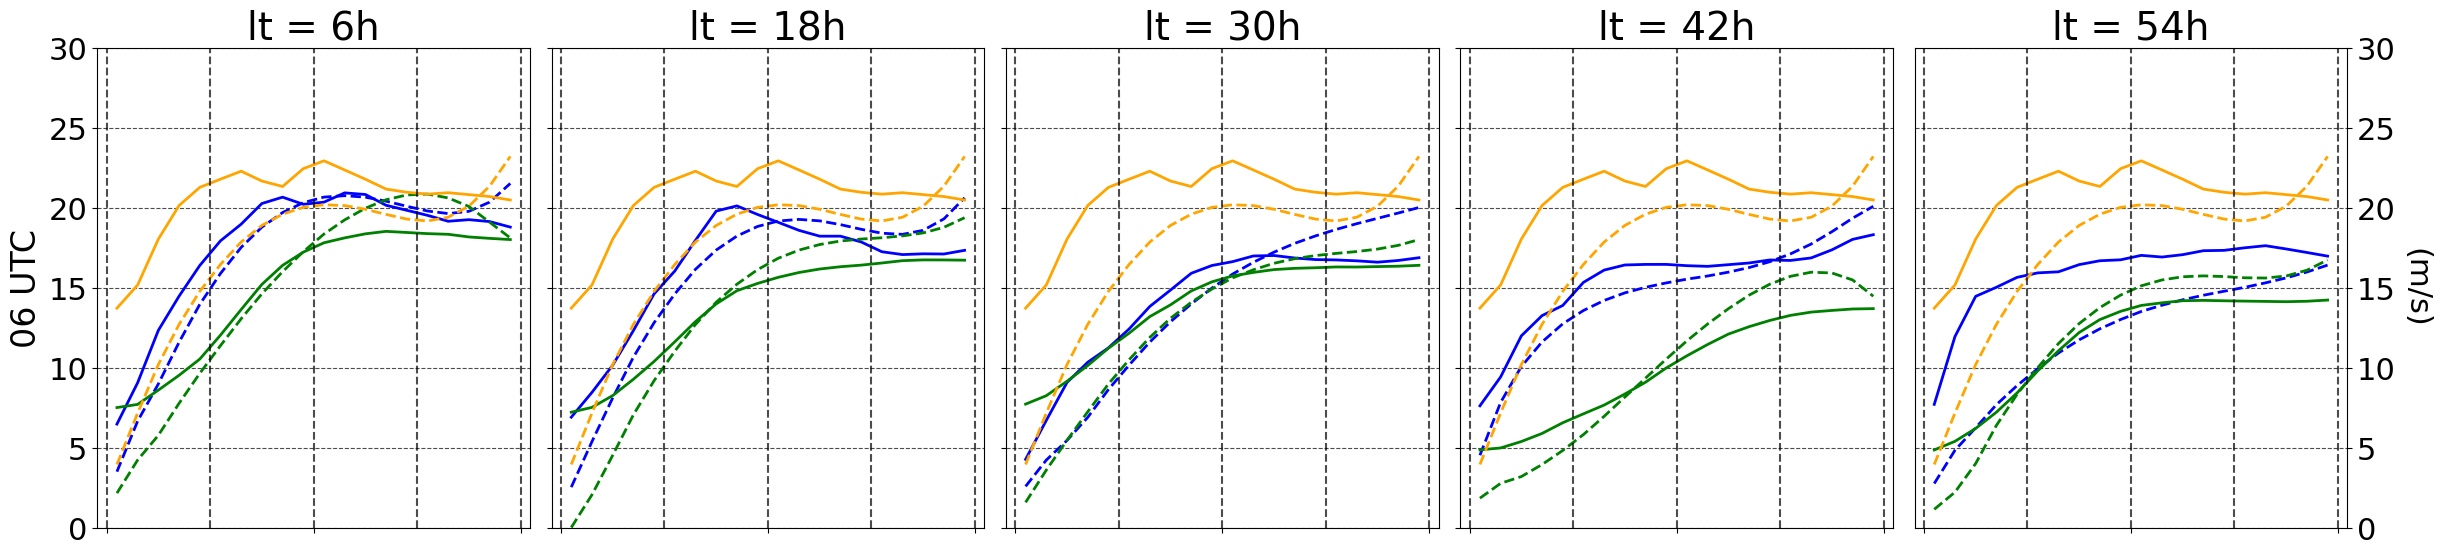

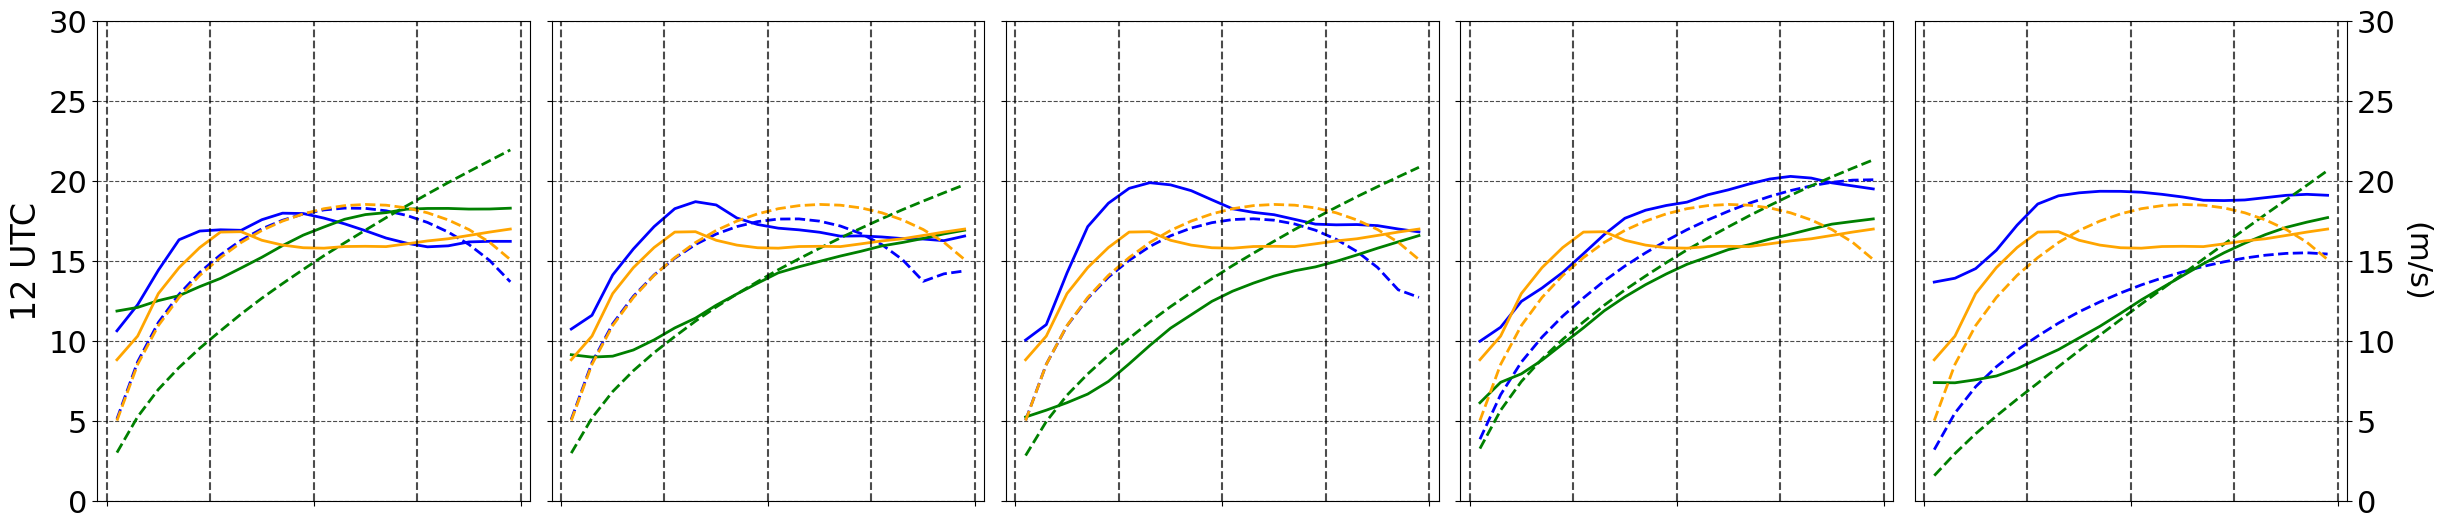

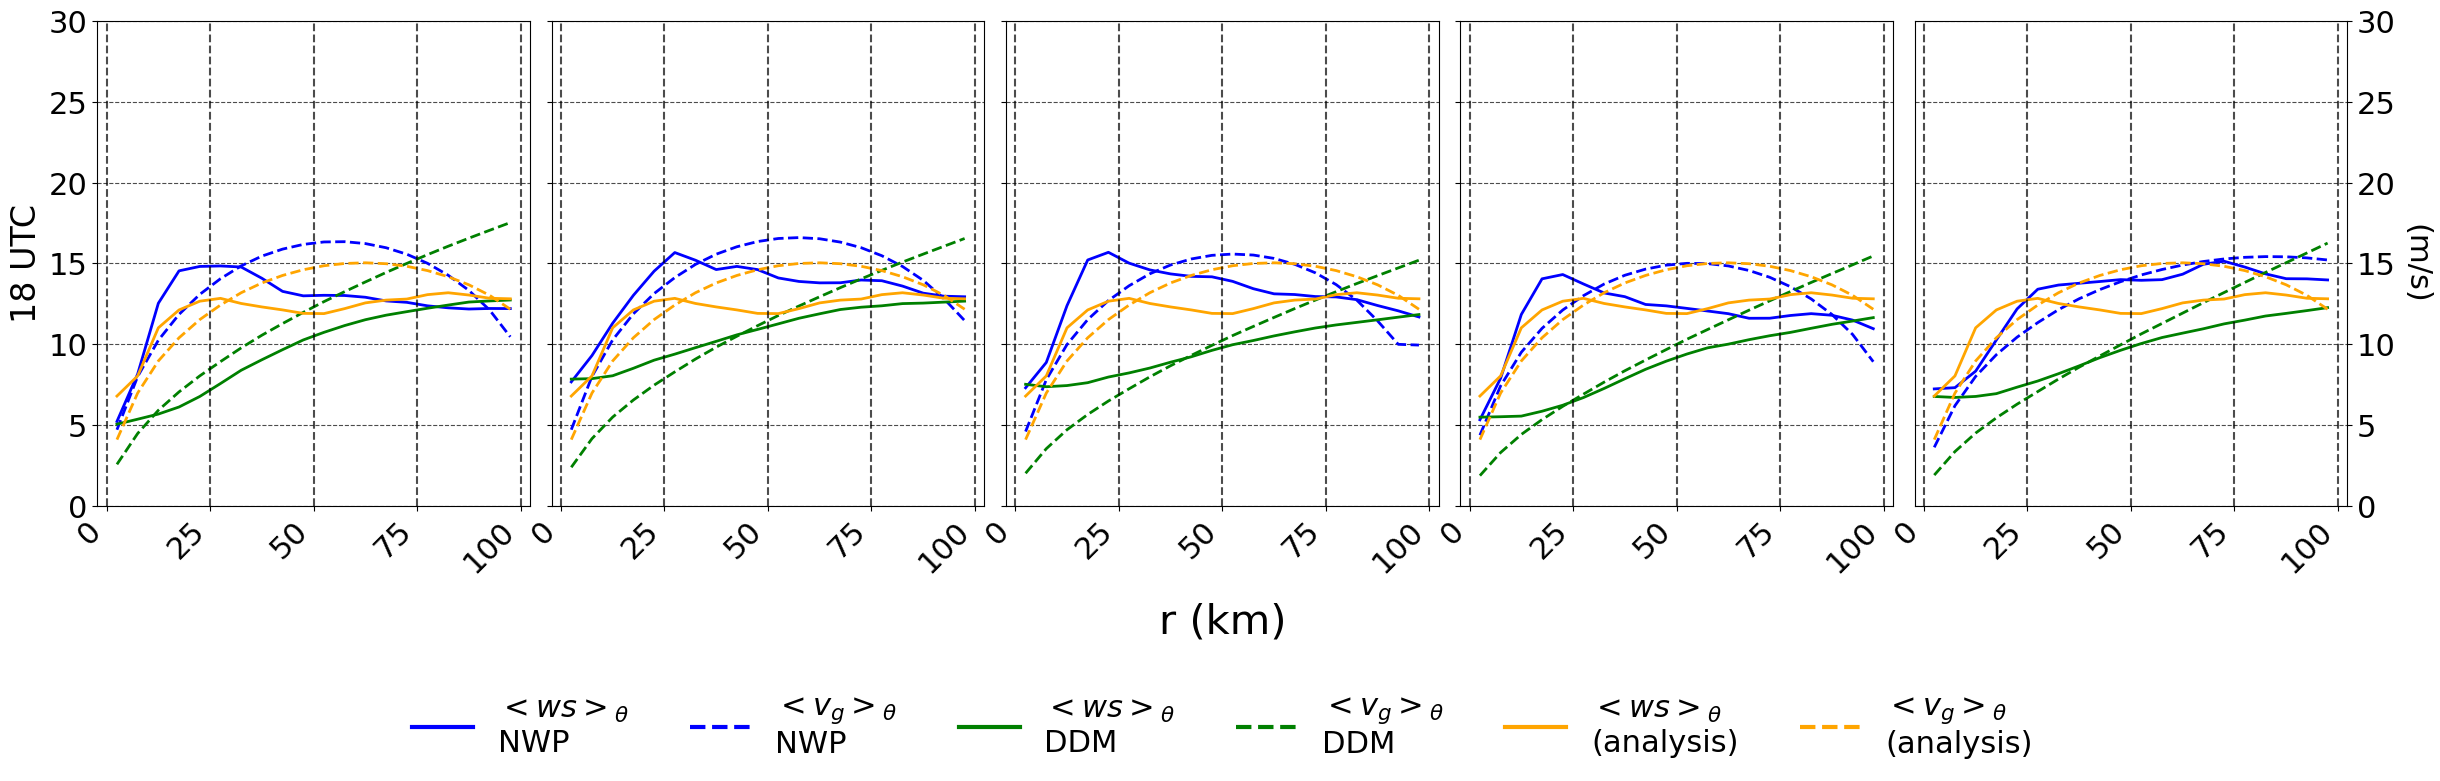

In [59]:
# Uncomment all datasets
inputs_POLY_NWP_new = [
    (NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (NWP_pred_18_0407, NWP_gt_06_0507, 12, '05/07/2023 06 UTC'),
    (NWP_pred_12_0407, NWP_gt_06_0507, 18, '05/07/2023 06 UTC'),
    (NWP_pred_06_0407, NWP_gt_06_0507, 24, '05/07/2023 06 UTC'),
    (NWP_pred_00_0407, NWP_gt_06_0507, 30, '05/07/2023 06 UTC'),
]

inputs_POLY_DDM_new = [
    (DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC'),
    (DDM_pred_18_0407, DDM_gt_06_0507, 2, '05/07/2023 06 UTC'),
    (DDM_pred_12_0407, DDM_gt_06_0507, 3, '05/07/2023 06 UTC'),
    (DDM_pred_06_0407, DDM_gt_06_0507, 4, '05/07/2023 06 UTC'),
    (DDM_pred_00_0407, DDM_gt_06_0507, 5, '05/07/2023 06 UTC'),
]

# Initialize lists to store all results
all_ws_pred_nwp = []
all_ws_pred_ddm = []
all_ws_gt_nwp = []
all_vg_pred_nwp = []
all_vg_pred_ddm = []
all_vg_gt_nwp = []
all_r_pred_nwp = []
all_r_pred_ddm = []
all_r_gt_nwp = []
all_lead_times = []

for (data_pred_DDM, data_gt_DDM, lead_time_DDM, time_DDM), \
    (data_pred_NWP, data_gt_NWP, lead_time_NWP, time_NWP) in zip(inputs_POLY_DDM_new, inputs_POLY_NWP_new):
    
    #print("\nProcessing lead time:", lead_time_NWP, "hours")
    
    try:
        ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP, \
        vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP, \
        r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP = function(
            pl_selected, 40, data_pred_NWP, data_gt_NWP, lead_time_NWP,
            data_pred_DDM, data_gt_DDM, lead_time_DDM, angles,
            LAT_NWP, LON_NWP, LAT_DDM, LON_DDM, 4, 4
        )
        
        # Validate data
        if any(np.all(np.isnan(arr)) for arr in [ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP,
                                                 vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP,
                                                 r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP]):
            print(f"Warning: Empty or invalid data for lead time {lead_time_NWP} hours")
            continue
        
        # Append results to the lists
        all_ws_pred_nwp.append(ws_pred_circ_NWP)
        all_ws_pred_ddm.append(ws_pred_circ_DDM)
        all_ws_gt_nwp.append(ws_gt_circ_NWP)
        all_vg_pred_nwp.append(vg_pred_fit_NWP)
        all_vg_pred_ddm.append(vg_pred_fit_DDM)
        all_vg_gt_nwp.append(vg_gt_fit_NWP)
        all_r_pred_nwp.append(r_pred_fit_NWP)
        all_r_pred_ddm.append(r_pred_fit_DDM)
        all_r_gt_nwp.append(r_gt_fit_NWP)
        all_lead_times.append(lead_time_NWP)
        
    except Exception as e:
        print(f"Error processing lead time {lead_time_NWP} hours: {e}")
        continue

# Create the combined plot
fig = plot_azimuthal_averages(
    all_ws_pred_nwp, all_ws_pred_ddm, all_ws_gt_nwp,
    all_vg_pred_nwp, all_vg_pred_ddm, all_vg_gt_nwp,
    all_r_pred_nwp, all_r_pred_ddm, all_r_gt_nwp,
    all_lead_times,
    xlabel="r (km)",
    ylabel="06 UTC",
    bin_width=5.0,
    grid_spacing=2.5,
    show_titles = True,
    show_xlabels=False,
    show_xticks=False,
    show_legend=False,
    save_path =  r"C:\Users\User\Documents\Paper_KNMI\Images_for_paper_high_resolution_adjusted\Fig5_azimuthal_06UTC.png"
)
plt.show()

# Uncomment all datasets
inputs_POLY_NWP_new = [
    (NWP_pred_06_0507, NWP_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (NWP_pred_00_0507, NWP_gt_12_0507, 12, '05/07/2023 12 UTC'),
    (NWP_pred_18_0407, NWP_gt_12_0507, 18, '05/07/2023 12 UTC'),
    (NWP_pred_12_0407, NWP_gt_12_0507, 24, '05/07/2023 12 UTC'),
    (NWP_pred_06_0407, NWP_gt_12_0507, 30, '05/07/2023 12 UTC'),
]

inputs_POLY_DDM_new = [
    (DDM_pred_06_0507, DDM_gt_12_0507, 1, '05/07/2023 12 UTC'),
    (DDM_pred_00_0507, DDM_gt_12_0507, 2, '05/07/2023 12 UTC'),
    (DDM_pred_18_0407, DDM_gt_12_0507, 3, '05/07/2023 12 UTC'),
    (DDM_pred_12_0407, DDM_gt_12_0507, 4, '05/07/2023 12 UTC'),
    (DDM_pred_06_0407, DDM_gt_12_0507, 5, '05/07/2023 12 UTC'),
]

# Initialize lists to store all results
all_ws_pred_nwp = []
all_ws_pred_ddm = []
all_ws_gt_nwp = []
all_vg_pred_nwp = []
all_vg_pred_ddm = []
all_vg_gt_nwp = []
all_r_pred_nwp = []
all_r_pred_ddm = []
all_r_gt_nwp = []
all_lead_times = []

for (data_pred_DDM, data_gt_DDM, lead_time_DDM, time_DDM), \
    (data_pred_NWP, data_gt_NWP, lead_time_NWP, time_NWP) in zip(inputs_POLY_DDM_new, inputs_POLY_NWP_new):
    
    #print("\nProcessing lead time:", lead_time_NWP, "hours")
    
    try:
        ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP, \
        vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP, \
        r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP = function(
            pl_selected, 40, data_pred_NWP, data_gt_NWP, lead_time_NWP,
            data_pred_DDM, data_gt_DDM, lead_time_DDM, angles,
            LAT_NWP, LON_NWP, LAT_DDM, LON_DDM, 2, 2
        )
        
        # Validate data
        if any(np.all(np.isnan(arr)) for arr in [ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP,
                                                 vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP,
                                                 r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP]):
            print(f"Warning: Empty or invalid data for lead time {lead_time_NWP} hours")
            continue
        
        # Append results to the lists
        all_ws_pred_nwp.append(ws_pred_circ_NWP)
        all_ws_pred_ddm.append(ws_pred_circ_DDM)
        all_ws_gt_nwp.append(ws_gt_circ_NWP)
        all_vg_pred_nwp.append(vg_pred_fit_NWP)
        all_vg_pred_ddm.append(vg_pred_fit_DDM)
        all_vg_gt_nwp.append(vg_gt_fit_NWP)
        all_r_pred_nwp.append(r_pred_fit_NWP)
        all_r_pred_ddm.append(r_pred_fit_DDM)
        all_r_gt_nwp.append(r_gt_fit_NWP)
        all_lead_times.append(lead_time_NWP)
        
    except Exception as e:
        print(f"Error processing lead time {lead_time_NWP} hours: {e}")
        continue

# Create the combined plot
fig = plot_azimuthal_averages(
    all_ws_pred_nwp, all_ws_pred_ddm, all_ws_gt_nwp,
    all_vg_pred_nwp, all_vg_pred_ddm, all_vg_gt_nwp,
    all_r_pred_nwp, all_r_pred_ddm, all_r_gt_nwp,
    all_lead_times,
    xlabel="r (km)",
    ylabel="12 UTC",
    bin_width=5.0,
    grid_spacing=2.5,
    show_titles = False,
    show_xlabels=False,
    show_xticks=False,
    show_legend=False,
    save_path =  ""
)
plt.show()

# Uncomment all datasets
inputs_POLY_NWP_new = [
    (NWP_pred_12_0507, NWP_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (NWP_pred_06_0507, NWP_gt_18_0507, 12, '05/07/2023 18 UTC'),
    (NWP_pred_00_0507, NWP_gt_18_0507, 18, '05/07/2023 18 UTC'),
    (NWP_pred_18_0407, NWP_gt_18_0507, 24, '05/07/2023 18 UTC'),
    (NWP_pred_12_0407, NWP_gt_18_0507, 30, '05/07/2023 18 UTC'),
]

inputs_POLY_DDM_new = [
    (DDM_pred_12_0507, DDM_gt_18_0507, 1, '05/07/2023 18 UTC'),
    (DDM_pred_06_0507, DDM_gt_18_0507, 2, '05/07/2023 18 UTC'),
    (DDM_pred_00_0507, DDM_gt_18_0507, 3, '05/07/2023 18 UTC'),
    (DDM_pred_18_0407, DDM_gt_18_0507, 4, '05/07/2023 18 UTC'),
    (DDM_pred_12_0407, DDM_gt_18_0507, 5, '05/07/2023 18 UTC'),
]

# Initialize lists to store all results
all_ws_pred_nwp = []
all_ws_pred_ddm = []
all_ws_gt_nwp = []
all_vg_pred_nwp = []
all_vg_pred_ddm = []
all_vg_gt_nwp = []
all_r_pred_nwp = []
all_r_pred_ddm = []
all_r_gt_nwp = []
all_lead_times = []

for (data_pred_DDM, data_gt_DDM, lead_time_DDM, time_DDM), \
    (data_pred_NWP, data_gt_NWP, lead_time_NWP, time_NWP) in zip(inputs_POLY_DDM_new, inputs_POLY_NWP_new):
    
    #print("\nProcessing lead time:", lead_time_NWP, "hours")
    
    try:
        ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP, \
        vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP, \
        r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP = function(
            pl_selected, 40, data_pred_NWP, data_gt_NWP, lead_time_NWP,
            data_pred_DDM, data_gt_DDM, lead_time_DDM, angles,
            LAT_NWP, LON_NWP, LAT_DDM, LON_DDM, 2, 2
        )
        
        # Validate data
        if any(np.all(np.isnan(arr)) for arr in [ws_pred_circ_NWP, ws_pred_circ_DDM, ws_gt_circ_NWP,
                                                 vg_pred_fit_NWP, vg_pred_fit_DDM, vg_gt_fit_NWP,
                                                 r_pred_fit_NWP, r_pred_fit_DDM, r_gt_fit_NWP]):
            print(f"Warning: Empty or invalid data for lead time {lead_time_NWP} hours")
            continue
        
        # Append results to the lists
        all_ws_pred_nwp.append(ws_pred_circ_NWP)
        all_ws_pred_ddm.append(ws_pred_circ_DDM)
        all_ws_gt_nwp.append(ws_gt_circ_NWP)
        all_vg_pred_nwp.append(vg_pred_fit_NWP)
        all_vg_pred_ddm.append(vg_pred_fit_DDM)
        all_vg_gt_nwp.append(vg_gt_fit_NWP)
        all_r_pred_nwp.append(r_pred_fit_NWP)
        all_r_pred_ddm.append(r_pred_fit_DDM)
        all_r_gt_nwp.append(r_gt_fit_NWP)
        all_lead_times.append(lead_time_NWP)
        
    except Exception as e:
        print(f"Error processing lead time {lead_time_NWP} hours: {e}")
        continue

# Create the combined plot
fig = plot_azimuthal_averages(
    all_ws_pred_nwp, all_ws_pred_ddm, all_ws_gt_nwp,
    all_vg_pred_nwp, all_vg_pred_ddm, all_vg_gt_nwp,
    all_r_pred_nwp, all_r_pred_ddm, all_r_gt_nwp,
    all_lead_times,
    xlabel="r (km)",
    ylabel="18 UTC",
    bin_width=5.0,
    grid_spacing=2.5,
    show_titles = False,
    show_xlabels=True,
    show_xticks=True,
    show_legend=True,
    save_path =  ""
)
plt.show()